In [1]:
import pandas as pd # Импортируем пандас преобразовав в сокращенный вид
import numpy as np # Импорт таблиц для различных математических выражений и матриц
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #Прочитаем датасет указав разделитель для данных датасета

In [2]:
print(data.head()) # Получим общую информацию о датасете сократив до 5ти строк

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


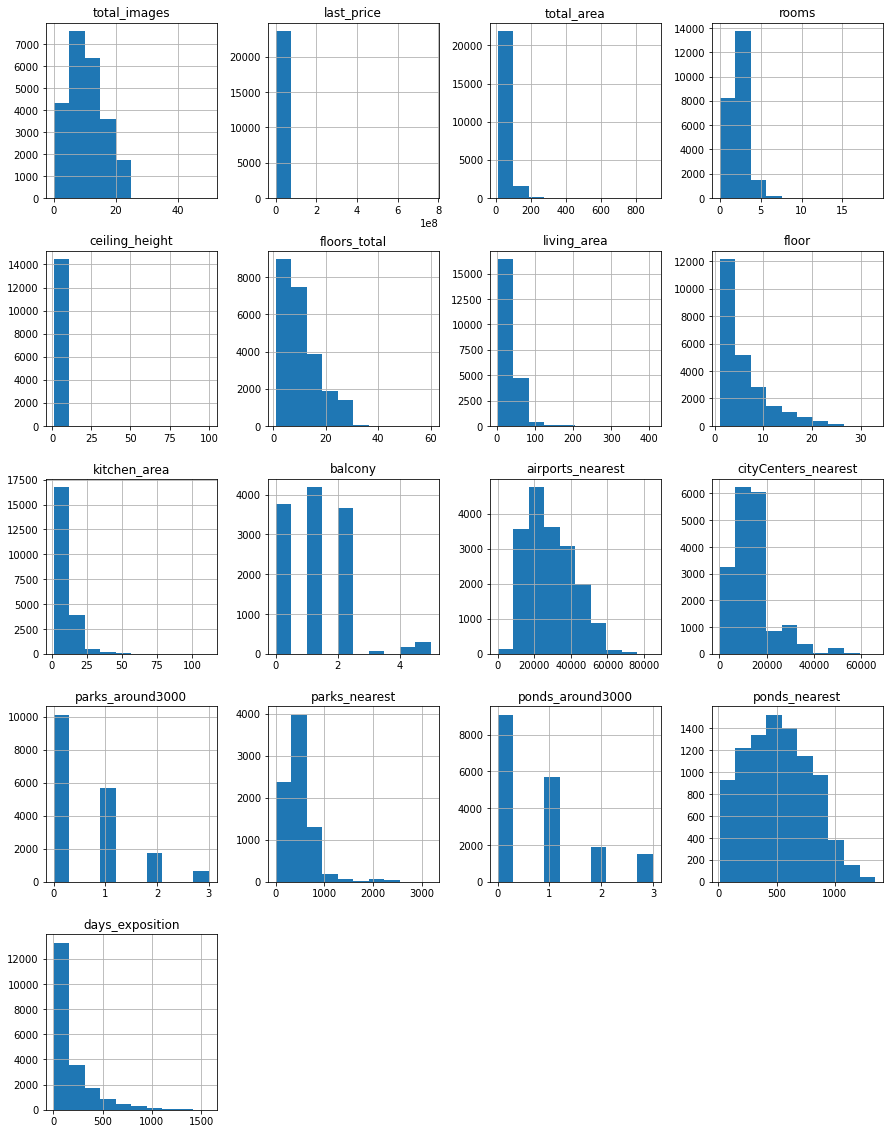

In [3]:
data.hist(figsize=(15, 20)) #Вызовем гистаграму по заданным габаритам
display(data)                 #Распечатаем результат

<div class="alert alert-info">
<b>1.В процессе проверки были обнаружены различные виды проблем в данных. Они связаны с пропусками и некорректными заначениями.
 </b>
    
<b>2.Пропуски были в категориальных и количественных даннх.</b>
    
<b>3.Встречались значения, к примеру высота потолков, которые объективно не соответствовали реальности и скорее всего были вызваны особенностями ввода со стороны пользователя.</b>
</div>

<h2>Шаг 2 Предобработка данных</h2>

<h3>1.Найдeм и изучим пропущенные значения в столбцах:</h3>


In [4]:
data.isnull().sum()#Определим, в каких столбцах есть пропуски.


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data['balcony'] = data['balcony'].fillna(0).astype('Int64')
data['locality_name'] = data['locality_name'].fillna('ГородХ').astype('object')
data_cel = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(data_cel).astype('Float64') #замена медианным значением

<h6>Причины, которые могли привести к пропускам в данных:</h6> 

1.Относительно расстояний до ближайших объектов, причин может быть несколько:а) непонимание расстояния, б) отсутствие объекта данной категории, в)банальный пропуск по причине низкой важности со стороны заполняемого.
    
2.Площади и высоты объектов вызывают вопросы о истенности данных в целом

3.Балконы и аппортаменты скорее всего не актуальны, иначе были бы указанны,т.к. это весомый фактор в жилом помещении

Пропущенные значения столбцов Аппортаменты, Балконы, Число парков, Число водоемов были заменены на ноль, так как столбцы имеют булев тип данных и скорее всего отсутствуют или их значимость(как в случае с водоемом и лесом) тяжело соотнести с их функцией.

<h3>Рассмотрите типы данных в каждом столбце:</h3>


In [7]:

data.info()#Найдите столбцы, в которых нужно изменить тип данных.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  Float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  Int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

<h6>Почему нужно изменить тип данных:</h6>      
1.Тип данных следует менять для того, чтобы перевести данные из строчного типа в формат в котором созможно проведение математических операций.

<h3>Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.</h3>

In [8]:
# Функция для замены  значений
def replace_word(string,old_word,new_word):
    # создаем условие
    if type(string)==str:
        if old_word in string:
            string = string.replace(old_word, new_word)
    return string
data['locality_name'] = data['locality_name'].apply(replace_word, args=("поселок городского типа", "п.г.т."))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('село', 'с.'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('деревня', 'д.'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('посёлок', 'п.'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('городское поселение', 'г.п'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('садоводческое некоммерческое товарищество', 'c.н.т.'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('городской поселок', 'г.п'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('пос.к', 'п.'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('п. городского типа', 'п.г.т'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('городской п.', 'г.п'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('пос. при железнодорожной станции', 'п.при ж.д.ст.'))
data['locality_name'] = data['locality_name'].apply(replace_word, args=('садовое товарищество', 'с.т'))

display(data['locality_name'].unique())


array(['Санкт-Петербург', 'п. Шушары', 'г.п Янино-1', 'п. Парголово',
       'п. Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'д. Кудрово', 'Коммунар', 'Колпино', 'п.г.т. Красный Бор',
       'Гатчина', 'д. Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'д. Новое Девяткино', 'п. Металлострой', 'п.г.т Лебяжье',
       'п.г.т Сиверский', 'п. Молодцово', 'п.г.т. Кузьмоловский',
       'с.т Новая Ропша', 'Павловск', 'д. Пикколово', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'д. Куттузи',
       'п. Аннино', 'п.г.т. Ефимовский', 'п. Плодовое', 'д. Заклинье',
       'п. Торковичи', 'п. Первомайское', 'Красное Село', 'п. Понтонный',
       'Сясьстрой', 'д. Старая', 'д. Лесколово', 'п. Новый Свет',
       'Сланцы', 'с. Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'д. Оржицы',
       'д. Кальтино', 'Кудрово', 'п. Романовка', 'п. Бугры',
       'п.г.т. Рощино', 'Кириши', 'Луга', 'Волос

<h3>Найдем и устраните редкие и выбивающиеся значения.</h3>

In [9]:
data = data.query("ceiling_height<=7") #Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.

In [10]:
data['ceiling_height'].unique()

<FloatingArray>
[ 2.7, 2.65, 3.03,  2.5, 2.67, 2.56, 3.05, 2.75,  2.6,  2.9,
 ...
 3.69,  6.0, 2.89, 3.58,  5.8, 2.49,  4.9, 3.48,  1.0, 3.59]
Length: 170, dtype: Float64

Было замечено, что основной проблемой в названиях в названиях было не использование аббревиатуры для обозначения типов населенных пунктов. Это затрудняло поиск и выявление неявных дублей.                       

In [11]:
data = data.query("total_area<=200")
data['total_area'].unique()   #Площадь     #Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [12]:
 data = data.query("last_price<=10000000")
data['last_price'].unique()              #Стоимость     #Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.

array([ 3350000.,  5196000., 10000000., ...,  2414306.,  3063600.,
        6151120.])

In [13]:
   data = data.query("0<rooms<=5")
data['rooms'].unique()            #Количество комнат    #Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.

array([1, 2, 3, 4, 5])







<h2>Шаг 3. Добавим в таблицу новые столбцы со следующими параметрами:</h2>

In [14]:
 data['price_for_square_meter'] = data['last_price'] / data['total_area']    #цена одного квадратного метра;

In [15]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [16]:
 data['weekly_exposition'] = data['first_day_exposition'].dt.weekday        #день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [17]:
 data['month_exposition'] = data['first_day_exposition'].dt.month            #месяц публикации объявления;

In [18]:
data['year_exposition'] = data['first_day_exposition'].dt.year              #год публикации объявления;

In [19]:
   def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'                                                         #тип этажа квартиры 
                                                                                #(значения — «первый», «последний», «другой»);

In [20]:
data['floor_category'] = data.apply(floor_category, axis = 1)#Разделение этажей квартир на категории соответственно функции

In [21]:
data['floor_category_first']=data.apply(floor_category, axis = 1)
print(data['floor_category_first'])

1        первый
2        другой
4        другой
5        другой
6        другой
          ...  
23693    другой
23694    другой
23695    другой
23696    первый
23698    первый
Name: floor_category_first, Length: 20746, dtype: object


In [22]:
data['cityCenters_nearest']=data['cityCenters_nearest']/1000 #расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [23]:



print(data['cityCenters_nearest'])  

1        18.603
2        13.933
4         8.098
5           NaN
6        19.143
          ...  
23693    34.104
23694     4.232
23695       NaN
23696       NaN
23698       NaN
Name: cityCenters_nearest, Length: 20746, dtype: float64


In [24]:
data['airports_nearest']=data['airports_nearest']/1000  #Переведем метры в километры до аэропорта

<h2>Шаг 4. Проведем исследовательский анализ данных:</h2>

<h3>Изучим следующие параметры объектов:</h3>

count    20746.000000
mean        52.302755
std         17.619282
min         12.000000
25%         39.000000
50%         48.500000
75%         62.100000
max        190.000000
Name: total_area, dtype: float64

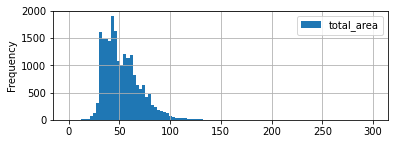

In [25]:

data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (6,2), range = (0,300))
data['total_area'].describe()                                                                          #общая площадь;


<h6>Наиболее распространена жилая площадь от 30 до 50 кв.м. Выбросов не наблюдается, поэтому можно параметр считать достоверным</h6>

count    19131.000000
mean        29.967288
std         12.739356
min          2.000000
25%         18.000000
50%         29.000000
75%         38.800000
max        112.000000
Name: living_area, dtype: float64

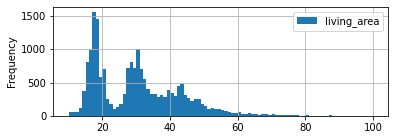

In [26]:
 data.plot(y = 'living_area', kind = 'hist', bins = 90, range = (10,100), grid=True, figsize = (6,2))
data['living_area'].describe()                                                                          #жилая площадь;

<h6>между пиками в 17 и 30 кв.м наблюлается спад популярности. Параметр требует дополнительного изучения</h6>

count    18929.000000
mean         9.446762
std          3.644223
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

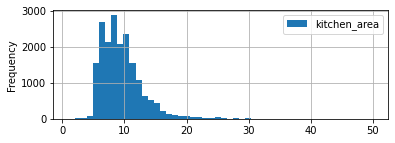

In [27]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, range = (1,50), grid=True, figsize = (6,2))
data['kitchen_area'].describe()                                                                            #площадь кухни;

<h6>наиболее распространенный размер  кухонь от 5 до 10 кв.м </h6>

In [28]:
data['last_price'] = data['last_price']/1000000
    
print(data['last_price'])

1         3.350
2         5.196
4        10.000
5         2.890
6         3.700
          ...  
23693     4.600
23694     9.700
23695     3.100
23696     2.500
23698     1.350
Name: last_price, Length: 20746, dtype: float64


count    20746.000000
mean         4.663730
std          1.965025
min          0.012190
25%          3.300000
50%          4.350000
75%          5.800000
max         10.000000
Name: last_price, dtype: float64

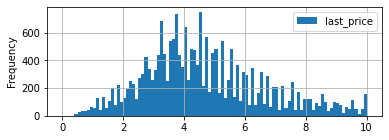

In [29]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,10), figsize = (6,2))
data['last_price'].describe()                                                                              #цена объекта;

<h6>4млн.р это цена, на которую тебя может сориенировать житель северной столицы, если спросить о стоимости жилья в этих местах.</h6>

count    20746.000000
mean         1.916225
std          0.875097
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

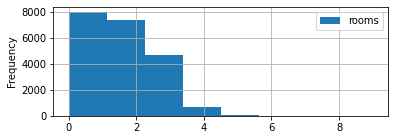

In [30]:
   data
data.plot(y = 'rooms', kind = 'hist', bins = 8, range = (0,9), grid=True, figsize = (6,2))
data['rooms'].describe()                                                                                 #количество комнат;

<h6>Наиболее популярным форматом жилья остаются однушки. Их среднюю стоимость можно попробовать скоррелировать на предыдущий параметр</h6>

count    20746.000000
mean         2.666692
std          0.175525
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max          5.300000
Name: ceiling_height, dtype: float64

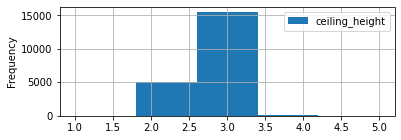

In [31]:
 data.plot(y = 'ceiling_height', kind = 'hist', bins = 5, range = (1,5), grid=True, figsize = (6,2))
data['ceiling_height'].describe()                                                                       #высота потолков;

<h6>Что что, а в потолках все просто и понятно. Похоже на четкий стандарт при строительстве

</h6>

count    20746.000000
mean         5.841560
std          4.877967
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

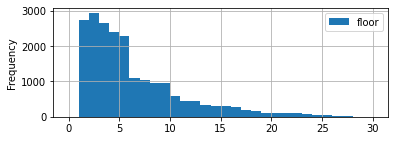

In [32]:
 data.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,30), grid=True, figsize = (6,2))
data['floor'].describe()                                                                               #этаж квартиры;

<h6>Вполне плавный, без сюрпризов, график. Стоит проверить несколько гипотиз: 1.Есть ли корреляция между соответствующей этажностью наиболее распространенных строений в местности. 2.Являются ли объективным предположение о том, что спрос на жилье возрастает с увеличением этажа.</h6>

AxesSubplot(0.125,0.125;0.775x0.755)


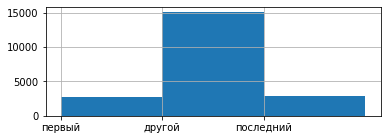

In [33]:
print(data['floor_category'].hist(range = (0,3),bins=3,figsize = (6,2)))
                                          #тип этажа квартиры («первый», «последний», «другой»);

count    20678.000000
mean        10.674823
std          6.590700
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

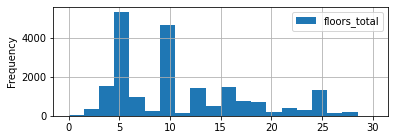

In [34]:
  data.plot(y = 'floors_total', kind = 'hist', bins = 20, range = (0,30), grid=True, figsize = (6,2))
data['floors_total'].describe()                        #общее количество этажей в доме;

<h6>Хрущевки и девятиэтажки это святое</h6>

count    15358.000000
mean        15.225062
std          8.565514
min          0.208000
25%         10.852000
50%         13.797000
75%         16.813750
max         65.968000
Name: cityCenters_nearest, dtype: float64

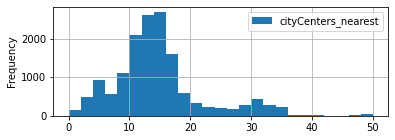

In [35]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 25, range = (0,50), grid=True, figsize = (6,2))
data['cityCenters_nearest'].describe()                                          #расстояние до центра города в метрах;

<h6>Можно предположить, что наибольшее количество квартир в диапазоне от 10 до 20 км. Неисключено, что это связано со строительством новостроек и как следствие увеличение количества квартир в высотках. Исторический центр по традиции не затронут</h6>

count    15346.000000
mean        29.022011
std         13.073397
min          0.000000
25%         18.023000
50%         27.223000
75%         37.894000
max         84.869000
Name: airports_nearest, dtype: float64

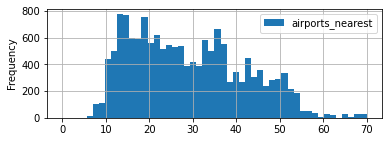

In [36]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 50, range = (0,70), grid=True, figsize = (6,2))
data['airports_nearest'].describe()                        #расстояние до ближайшего аэропорта;

<h6>Густо населенный район начинается в радуиусе 10 км от аэропорта, и стоит предположить, что это район новостроек города.Дальше население уменьшается. После 55 км данные возможно рассмотреть как статистическую погрешность.</h6>

count    6314.000000
mean        0.486648
std         0.322854
min         0.001000
25%         0.290000
50%         0.456000
75%         0.612000
max         3.190000
Name: parks_nearest, dtype: float64

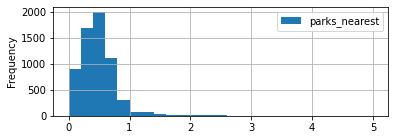

In [37]:
data['parks_nearest']=data['parks_nearest']/1000 
data.plot(y = 'parks_nearest', kind = 'hist', bins = 25, range = (0,5), grid=True, figsize = (6,2))
data['parks_nearest'].describe()                      #расстояние до ближайшего парка;

<h6>Парк дальше чем 3-4 км выпадает из области интересов</h6>

count    20746.000000
mean         2.576207
std          1.796250
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekly_exposition, dtype: float64

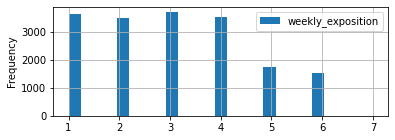

In [38]:
data.plot(y = 'weekly_exposition', kind = 'hist', bins = 25, range = (1,7), grid=True, figsize = (6,2))
data['weekly_exposition'].describe() 

<h6>Ближе к выходным активность падает</h6>

count    20746.000000
mean         6.389906
std          3.489260
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

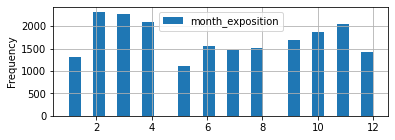

In [39]:
 data.plot(y = 'month_exposition', kind = 'hist', bins = 25, range = (1,12), grid=True, figsize = (6,2))
data['month_exposition'].describe()                          #день и месяц публикации объявления.

<h6>Солнце и оливье забирают фокус внимания на себя</h6>

count    20746.000000
mean      2017.386484
std          1.019245
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exposition, dtype: float64

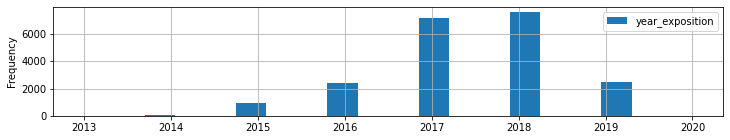

In [40]:
data.plot(y = 'year_exposition', kind = 'hist', bins = 20, range = (2013,2020), grid=True, figsize = (12,2))
data['year_exposition'].describe()

<h6>Наибольших значений цена достигала в 2017-18 годах.</h6>

<h3>Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.</h3>


count    18266.000000
mean       171.463156
std        208.636448
min          1.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

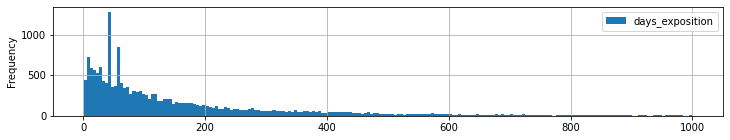

In [41]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, range = (1,1000), grid=True, figsize = (12,2))
data['days_exposition'].describe()                                                                #Постройте гистограмму.

In [42]:
 print(data['days_exposition'].median())                                                        #Посчитайте среднее и медиану.

91.0


<h6>   Выяснили,что cредняя проодажа занимает примерно 2.5 месяца со дня экспозиции. </h6>
    
<h6>    Наиболее быстрыми можно назвать продажи, которые выпадают из среднерыночной  стоимости в меньшую сторону, а так же имеют хорошее состояние.</h6>
    
<h6>    В основном, продажа растягивается по времени от необоснованно завышеной стоимости объекта продавцом.</h6>

<h3>Какие факторы больше всего влияют на общую (полную) стоимость объекта?</h3>

Изучим, зависит ли цена от:

0.6574570301385555

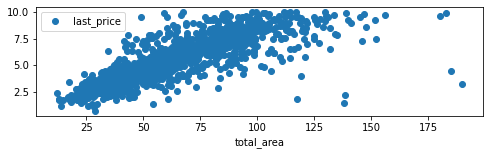

In [43]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['count', 'median'])
#Создаем сводную таблицу
pivot_table_total_area.plot(y = 'median', style = 'o',figsize = (8,2))
#Зададим параметры графику
data['total_area'].corr(data['last_price']) 
#Выявляем степень коррелляции                                                                                    #общей площади;

<h6>Увеличение площади напрямую, на коэффициет 0.65 влияет на цену. Есть незначительные отклонения, которые трубуют дополнительного изучения</h6>

-0.22734821613147382

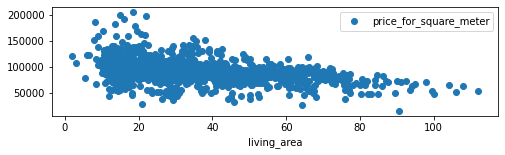

In [44]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'price_for_square_meter', aggfunc = ['count', 'median'])
#Создаем сводную таблицу и сохраним ее в переменную
pivot_table_living_area.plot(y = 'median', style = 'o',figsize = (8,2))
#Проявим график для таблицы и Зададим ему параметры 
data['living_area'].corr(data['price_for_square_meter']) 
#Выявляем степень коррелляции                                                                                  #жилой площади;

<h6>Можно сказать что корреляции нет, а меняется только концентрация</h6>

0.442974970660545

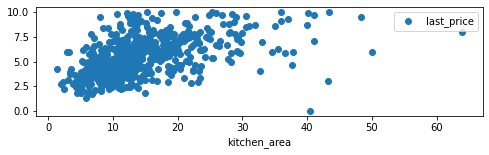

In [45]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['count', 'median'])
#Создаем сводную таблицу и сохраним ее в переменную
pivot_table_kitchen_area.plot(y = 'median', style = 'o',figsize = (8,2))
#Проявим график для таблицы и Зададим ему параметры 
data['kitchen_area'].corr(data['last_price']) 
#Выявляем степень коррелляции                                                                                  #площади кухни;

<h6>Незначитеьные отклонения</h6>

0.42326219923947567

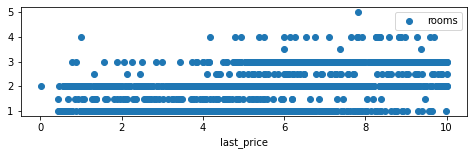

In [46]:
pivot_table_last_price = data.pivot_table(index = 'last_price', values = 'rooms', aggfunc = ['count', 'median'])
#Создаем сводную таблицу и сохраним ее в переменную
pivot_table_last_price.plot(y = 'median', style = 'o',figsize = (8,2))
#Проявим график для таблицы и Зададим ему параметры 
data['last_price'].corr(data['rooms']) 
#Выявляем степень коррелляции                                                                               #количества комнат;

<h6>Слабое влияние</h6>

,mean,count,median
year_exposition,,,
2014,5.334046,82,5.335
2015,4.959690,958,4.750
2016,4.618892,2440,4.250
2017,4.598771,7156,4.250
2018,4.604740,7600,4.300
2019,4.936267,2510,4.750


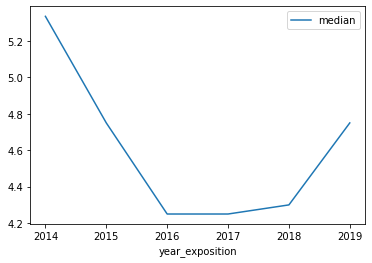

In [47]:
center_spb_floor_category = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

<h6>17-18 наблюдался всплеск</h6>

,mean,count,median
month_exposition,,,
1,4.640265,1305,4.35
2,4.650238,2315,4.33
3,4.647015,2277,4.39
4,4.770347,2099,4.50
5,4.651356,1119,4.30
6,4.512320,1569,4.15
7,4.674384,1478,4.30
8,4.645243,1517,4.30
9,4.670204,1690,4.30


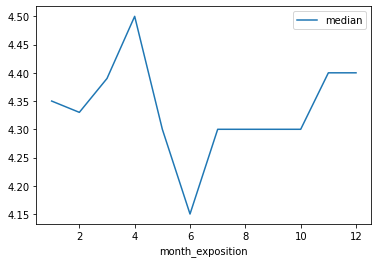

In [48]:
center_spb_floor_category = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

<h6>Цена выше в межсезонье в отличие от зимы и лета</h6>

,mean,count,median
weekly_exposition,,,
0,4.677485,3178,4.350
1,4.680185,3645,4.399
2,4.704306,3471,4.400
3,4.637460,3692,4.300
4,4.687018,3526,4.350
5,4.586738,1725,4.300
6,4.599548,1509,4.342


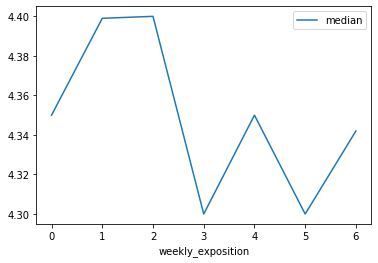

In [49]:
center_spb_floor_category = data.pivot_table(index = 'weekly_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

<h6>Есть кореляция, однако она не представляет ценности для квартирных циклов, которые в среднем имеют 2,5 месяца жизни. Максимальный всплеск в начале недели, с дальнейшим затуханием к выходным.</h6>

,mean,count,median
floor_category,,,
другой,4.849055,15050,4.50
первый,4.048779,2750,3.80
последний,4.274469,2881,3.99


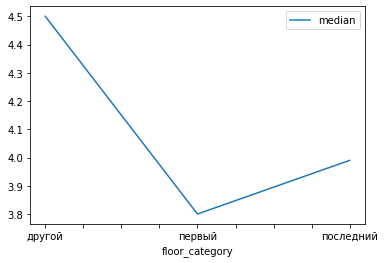

In [50]:
center_spb_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category



<h6>Менее популярные первые этажи, чуть более популярны последние и средина в топе</h6>

<h3>Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах</h3> с наибольшим числом объявлений. 
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
Эти данные можно найти по имени в столбце locality_name.

In [51]:
top_10 = data['locality_name'].value_counts().head(10) #посчитаем количество о-й по регионам и выведем топ 10
top_price_for_square_meter = data.query('locality_name in (@top_10.index)').pivot_table(values='price_for_square_meter', index='locality_name')
top_price_for_square_meter = top_price_for_square_meter.astype(int) #преобразуем до целого
top_price_for_square_meter.sort_values('price_for_square_meter', ascending=False) #оставим список по убыванию

,price_for_square_meter
locality_name,
Санкт-Петербург,104211
Пушкин,100061
д. Кудрово,92210
п. Парголово,90448
п. Мурино,85040
п. Шушары,78335
Колпино,75185
Гатчина,68432
Всеволожск,66754


<h6>Дальше от центра, ниже цена. Утверждение подтверждается плавностью уменьшения цены.</h6>

<h6>Санкт-Петербург самый дорогой город по стоимость за квадратный метр жилья</h6>

Ранее вы посчитали расстояние до центра в километрах. 
<h3>Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.</h3> 
Опишем, как стоимость объектов зависит от расстояния до центра города.

In [52]:
#извлечем из списка квартиры в центре
center_spb_data = data.query('locality_name == "Санкт-Петербург"')

-0.2683636635598859

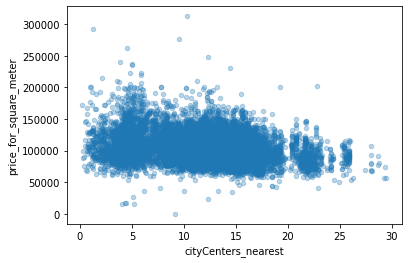

In [53]:
center_spb_data.plot(kind = 'scatter', y = 'price_for_square_meter', x = 'cityCenters_nearest', alpha = 0.3)
center_spb_data['cityCenters_nearest'].corr(center_spb_data['price_for_square_meter'])


In [54]:
data['cityCenters_nearest'] = np.floor(pd.to_numeric(data['cityCenters_nearest'], errors='coerce')).astype('Int64')

In [55]:
piter_region_price = (data.query('locality_name=="Санкт-Петербург"').pivot_table(index='cityCenters_nearest',values='price_for_square_meter').astype('int64'))

In [56]:
display(piter_region_price.head(10))

,price_for_square_meter
cityCenters_nearest,
0,116258
1,113429
2,110631
3,107685
4,116686
5,120057
6,116589
7,116119
8,109574


<h6>Наибольшая цена недвижимости наблюдается в радуиусе 5 км от центра.</h6>

<h2>Шаг 5. Общий вывод</h2>

   1.Можно сказать, что наиболее распространены одн-двух комнатные квартиры средней площадью 50 м.кв. на удалении от центра 15 км.
   
     2.Особо пользуются спросом этажи от 3 до 6. 
   
   3.Наиболее интенсивный период размещения это вся неделя кроме выходных. 
   
   4. В течении года активность проявляется в межсезонье.
   
   5. Наибольшее влияние на цену оказывает удаленность от центра.
   
   6.Подажа в среднем происходит в течении 2х месяцев.
   Врезультате проведенной работы, были выявленны несколько несоответствий типов данных по столбцам. 
   
   Были предприняты методы корректировки, которые были наиболее оптимальны и не ограничивали работу кода. 
   
   Наряду с подстройкой данных, выявлялись и устранялись аномальные значения, которые в своей основе имеют различную природу. 
   
   Наиболее распространенная и ярковыраженная прблема в цыфрах, которые относятся к высоте потолков.
   
   В наименовании населенных пунктов, было выявленно ряд скрытых дупликатов, которые в сочетании с длинными названиями 
   
   населенных пунктов, усложняли поиск и устранение. Было принято решение сократить названия до аббревиатур, что позволило до 
   
   50% сократить список уникальных фраз. 
   
   Были проведены ряд изменений форматов чисел для удобства восприятия и расчетов. Добавили новые столбцы, которые участвовали в 
   
   построении гистограмм. Очень помог столбец средней цены за квадратный метр. Он позволил определить изменение средней цены в 
   
   зависимости от расстояния, а так же провести сравнительный анализ и вявить другие закономерности на основе этих данных.
   